In [1]:
import sys
import glob
import os
import io
import logging
from pprint import pprint
import gmake
from gmake.model import clouds_morph
from gmake.model import clouds_kin
from gmake.model import clouds_tosky
from gmake.model import clouds_fromobj
from gmake.discretize import xy_mapper
from gmake.evaluate import uv_chisq
from astropy.coordinates import SkyCoord
from gmake.tests.test_cloudlet import *
import astropy.units as u
import numpy as np

import socket
if  'hypersion' or 'mini' in socket.gethostname() :
    os.chdir(gmake.__demo__+'/../gmake/tests/results/mockup/uv_nelder')
    os.chdir(gmake.__demo__+'/../gmake/tests/results/mockup/sbrci')
print(sys.version)

print(socket.gethostname())
print(os.getcwd())
print(gmake.__version__)
print(gmake.__email__)
print(gmake.__demo__)
inpfile=gmake.__demo__+'/../gmake/tests/data/mockup_basic_opt_ab.inp'
inpfile='xy00_mc.inp'
logfile=''
#gmake.logger_config()
#gmake.logger_status()
#import pprint
#pprint.pprint(logging.Logger.manager.loggerDict)
inp_dct=gmake.read_inp(inpfile)
inp_dct=gmake.inp_validate(inp_dct)
outdir=inp_dct['general']['outdir']
gmake.logger_config(logfile=outdir+'/gmake.log',loglevel='DEBUG',logfilelevel='DEBUG')
gmake.logger_status()
%reload_ext line_profiler
%reload_ext memory_profiler

#%time dat_dct=gmake.read_data(inp_dct,fill_mask=True,fill_error=True)
#%prun dat_dct=gmake.read_data(inp_dct,fill_mask=True,fill_error=True)
#%lprun -f gmake.read_data dat_dct=gmake.read_data(inp_dct,fill_mask=True,fill_error=True)
#%memit dat_dct=gmake.read_data(inp_dct)
#%mprun -f gmake.read_data dat_dct=gmake.read_data(inp_dct)

3.8.2 (default, Feb 27 2020, 22:13:36) 
[Clang 11.0.0 (clang-1100.0.33.17)]
hyperion
/Users/Rui/Resilio/Workspace/projects/GMaKE/gmake/tests/results/mockup/sbrci
0.2.dev1
rx.astro@gmail.com
/Users/Rui/Resilio/Workspace/projects/GMaKE/gmake
<Logger gmake (DEBUG)>
[<FileHandler /Users/Rui/Resilio/Workspace/projects/GMaKE/gmake/tests/results/mockup/sbrci/xy00/gmake.log (DEBUG)>, <StreamHandler stderr (DEBUG)>]


In [24]:
inp_dct=gmake.read_inp(inpfile)
dat_dct=gmake.read_data(inp_dct)
mod_dct=gmake.inp2mod(inp_dct)
#pprint(dat_dct)
#pprint(inp_dct)
#pprint(dat_dct)

use MKL_FFT for convolve_fft
use MKL_RANDOM for RNG
read data (may take some time..)
loading: ../../../data/mockup_basic/00.ms/dm.image.fits to 
data@../../../data/mockup_basic/00.ms/dm.image.fits header@../../../data/mockup_basic/00.ms/dm.image.fits
(1, 120, 384, 384)67.50013732910156 Mibyte
loading: ../../../data/mockup_basic/00.ms/dm.psf.fits to 
psf@../../../data/mockup_basic/00.ms/dm.image.fits
(1, 120, 384, 384)67.50013732910156 Mibyte
loading: ../../../data/mockup_basic/00.ms/dm.pb.fits to 
pbeam@../../../data/mockup_basic/00.ms/dm.image.fits
(1, 120, 384, 384)144.0 byte
--------------------------------------------------------------------------------
--- dat_dct size 47.18 Kibyte ---
--- took 0.14201  seconds ---


In [25]:
#pprint(np.sum(dat_dct['weight@../../../data/mockup_basic_withnoise.ms']==0))
inp_dct=gmake.read_inp(inpfile)
#inp_dct=gmake.inp_validate(inp_dct)
#mod_dct=gmake.inp2mod(inp_dct)
#gmake.clouds_fill(mod_dct)
#print(mod_dct)
#models=gmake.model_setup(gmake.inp2mod(inp_dct),dat_dct)

fit_dct,models=gmake.opt_setup(inp_dct,dat_dct)
#pprint(models)
#models['error@../../data/mockup_basic_withnoise.ms/dm.image.fits']
#pprint(fit_dct)
#pprint(models)
from gmake.utils import fft_use
import gmake
print(fft_use)
%lprun -f gmake.opt_iterate gmake.opt_iterate(fit_dct,inp_dct,dat_dct,models,resume=False)
#gmake.opt_iterate(fit_dct,inp_dct,dat_dct,models)

++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
optimizer: lmfit-leastsq
optimizing parameters:
----------------------------------------------------------------------------------------------------
index    name    unit    start    lo_limit    up_limit    scale
 0   lineflux@co21         1.00      Jy km / s  (     0.10      Jy km / s,      10.00     Jy km / s )     9.00      Jy km / s 
 1   inc@basics            44.06     deg  (     10.00     deg,      80.00     deg )     35.94     deg 
 2   vSigma@basics         60.00     km / s  (     5.00      km / s,     200.00     km / s )    140.00     km / s 
 3   rcProf[1]@basics     300.00     km / s  (     0.00      km / s,     500.00     km / s )    300.00     km / s 
 4   sbProf[1]@co21        3.20      kpc  (     1.00      kpc,      50.00     kpc )     46.80     kpc 
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
ndim:    5
outdir:  ./

<module 'mkl_fft._numpy_fft' from '/Users/Rui/Library/Python/3.8/lib/python/site-packages/mkl_fft/_numpy_fft.py'>


[<Quantity 1. Jy km / s>, <Quantity 44.06 deg>, <Quantity 60. km / s>, <Quantity 300. km / s>, <Quantity 3.2 kpc>] 2574778.933844644 277800
[<Quantity 1. Jy km / s>, <Quantity 44.06 deg>, <Quantity 60. km / s>, <Quantity 300. km / s>, <Quantity 3.2 kpc>] 2574774.166246652 277800
[<Quantity 1. Jy km / s>, <Quantity 44.06 deg>, <Quantity 60. km / s>, <Quantity 300. km / s>, <Quantity 3.2 kpc>] 2574746.1847878443 277800
[<Quantity 2.03380215 Jy km / s>, <Quantity 44.06 deg>, <Quantity 60. km / s>, <Quantity 300. km / s>, <Quantity 3.2 kpc>] 2731617.9022878488 277800
[<Quantity 1. Jy km / s>, <Quantity 44.35721294 deg>, <Quantity 60. km / s>, <Quantity 300. km / s>, <Quantity 3.2 kpc>] 2574754.6182747474 277800
[<Quantity 1. Jy km / s>, <Quantity 44.06 deg>, <Quantity 72.90488887 km / s>, <Quantity 300. km / s>, <Quantity 3.2 kpc>] 2575372.5122405114 277800
[<Quantity 1. Jy km / s>, <Quantity 44.06 deg>, <Quantity 60. km / s>, <Quantity 315.48525157 km / s>, <Quantity 3.2 kpc>] 2574734.307

[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 21
    # data points      = 277800
    # variables        = 5
    chi-square         = 2574365.57
    reduced chi-square = 9.26714151
    Akaike info crit   = 618519.747
    Bayesian info crit = 618572.421
[[Variables]]
    p_1:  0.96173598 +/- 0.01168256 (1.21%) (init = 1)
    p_2:  44.2530698 +/- 0.32055330 (0.72%) (init = 44.06)
    p_3:  57.8550050 +/- 2.37305438 (4.10%) (init = 60)
    p_4:  285.798177 +/- 12.0880869 (4.23%) (init = 300)
    p_5:  3.46408304 +/- 0.18925317 (5.46%) (init = 3.2)
[[Correlations]] (unreported correlations are < 0.100)
    C(p_3, p_4) = -0.667
    C(p_1, p_5) =  0.666
    C(p_2, p_4) = -0.533
    C(p_4, p_5) = -0.275
    C(p_1, p_3) =  0.247
    C(p_1, p_4) = -0.207
    C(p_2, p_3) =  0.192
    C(p_3, p_5) = -0.101


Timer unit: 1e-06 s

Total time: 32.8172 s
File: /Users/Rui/Resilio/Workspace/projects/GMaKE/gmake/opt.py
Function: opt_iterate at line 266

Line #      Hits         Time  Per Hit   % Time  Line Contents
   266                                           def opt_iterate(fit_dct,inp_dct,dat_dct,models,resume=False):
   267                                           
   268         1          2.0      2.0      0.0      method=fit_dct['method'].split('-')[0]
   269                                               
   270         1          0.0      0.0      0.0      if  method=='emcee':
   271                                                   opt_name='emcee'
   272                                               else:
   273         1          2.0      2.0      0.0          opt_name='chisq'
   274                                               
   275         1        596.0    596.0      0.0      logger.debug('max_iteration:'+str(inp_dct['optimize']['niter']))
   276         2   32816571.0 164082

In [2]:
import gmake
import socket
if  'hypersion' or 'mini' in socket.gethostname() :
    os.chdir(gmake.__demo__+'/../gmake/tests/results/mockup/uv_nelder')
    os.chdir(gmake.__demo__+'/../gmake/tests/results/mockup/sbrci')
print(sys.version)

print(socket.gethostname())
print(os.getcwd())
print(gmake.__version__)
print(gmake.__email__)
print(gmake.__demo__)
inpfile=gmake.__demo__+'/../gmake/tests/data/mockup_basic_opt_ab.inp'
inpfile='xy00_mc.inp'
#pprint(np.sum(dat_dct['weight@../../../data/mockup_basic_withnoise.ms']==0))
inp_dct=gmake.read_inp(inpfile)
#inp_dct=gmake.inp_validate(inp_dct)
mod_dct=gmake.inp2mod(inp_dct)
gmake.clouds_fill(mod_dct)
#print(mod_dct)
#models=gmake.model_setup(gmake.inp2mod(inp_dct),dat_dct)

#fit_dct,models=gmake.opt_setup(inp_dct,dat_dct,initial_model=True)
#pprint(models)
#models['error@../../data/mockup_basic_withnoise.ms/dm.image.fits']
#pprint(fit_dct)
#pprint(models)
#%lprun -f gmake.evaluate.calc_wdev gmake.opt_iterate(fit_dct,inp_dct,dat_dct,models,resume=False)
#gmake.opt_iterate(fit_dct,inp_dct,dat_dct,models)
#p0=[q.value for q in fit_dct['p_start']]
#gmake.utils.set_threads(1)
##%timeit gmake.evaluate.calc_wdev(p0,fit_dct=fit_dct,inp_dct=inp_dct,models=models)
#%lprun -f gmake.evaluate.xy_mapper gmake.evaluate.calc_wdev(p0,fit_dct=fit_dct,inp_dct=inp_dct,models=models)

3.8.2 (default, Feb 27 2020, 22:13:36) 
[Clang 11.0.0 (clang-1100.0.33.17)]
hyperion
/Users/Rui/Resilio/Workspace/projects/GMaKE/gmake/tests/results/mockup/sbrci
0.2.dev1
rx.astro@gmail.com
/Users/Rui/Resilio/Workspace/projects/GMaKE/gmake


In [29]:
%lprun -f gmake.clouds_fromobj gmake.clouds_fill(mod_dct)
#%timeit gmake.clouds_fill(mod_dct)

Timer unit: 1e-06 s

Total time: 0.173958 s
File: /Users/Rui/Resilio/Workspace/projects/GMaKE/gmake/model.py
Function: clouds_fromobj at line 536

Line #      Hits         Time  Per Hit   % Time  Line Contents
   536                                           def clouds_fromobj(obj,
   537                                                              nc=100000,nv=20,seeds=[None,None,None,None]):
   538                                               """
   539                                               This is a wrapper function to create a cloudlet model from a object dict 
   540                                               """
   541         2      13068.0   6534.0      7.5      car,cloudmeta=clouds_morph(sbProf=obj['sbProf'],
   542         1          1.0      1.0      0.0                            rotPhi=obj['rotAz'] if  'rotAz' in obj else None,
   543         1          1.0      1.0      0.0                            sbQ=obj['sbQ'] if  'sbQ' in obj else None,
   544         1 

In [12]:
inp_dct=gmake.read_inp(inpfile)
inp_dct=gmake.inp_validate(inp_dct)
mod_dct=gmake.inp2mod(inp_dct)
gmake.clouds_fill(mod_dct)
#print(mod_dct)
#models=gmake.model_setup(gmake.inp2mod(inp_dct),dat_dct)

#fit_dct,models=gmake.opt_setup(inp_dct,dat_dct,initial_model=False)
#pprint(models)
#models['error@../../data/mockup_basic_withnoise.ms/dm.image.fits']
#pprint(fit_dct)
#pprint(models)
#%lprun -f gmake.opt_iterate gmake.opt_iterate(fit_dct,inp_dct,dat_dct,models,resume=False)
#gmake.opt_iterate(fit_dct,inp_dct,dat_dct,models)

In [65]:
#p_chisq=gmake.hdf2dct(fit_dct['outfolder']+'/chisq_chain.h5')
#p_chisq['blobs']['pars'].shape
#print(models['sample@../../data/mockup_basic_withnoise.ms/dm.image.fits'].shape)
#print(models['data-sp@../../data/mockup_basic_withnoise.ms/dm.image.fits'].shape)
#print(gmake.xy_chisq([mod_dct['co21']],'../../data/mockup_basic_withnoise.ms/dm.image.fits',dat_dct,models))
%timeit gmake.xy_chisq([mod_dct['co21']],'../../data/mockup_basic_withnoise.ms/dm.image.fits',dat_dct,models)


545 ms ± 14.1 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [66]:
#print(gmake.evaluate.xy_chisq0([mod_dct['co21']],'../../data/mockup_basic_withnoise.ms/dm.image.fits',dat_dct,models))
%timeit gmake.evaluate.xy_chisq0([mod_dct['co21']],'../../data/mockup_basic_withnoise.ms/dm.image.fits',dat_dct,models)
#%lprun -f gmake.evaluate.xy_chisq0 gmake.evaluate.xy_chisq0([mod_dct['co21']],'../../data/mockup_basic_withnoise.ms/dm.image.fits',dat_dct,models)

542 ms ± 16.5 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [3]:
#import emcee
#h5name=fit_dct['outfolder']+'/emcee_chain.h5'
#backend = emcee.backends.HDFBackend(h5name)
#print(backend)
#p_amoeba=gmake.hdf2dct(fit_dct['outfolder']+'/amoeba_chain.h5')
#import gmake
gmake.analyze.opt_analyze(inpfile,export=False,burnin=180)
#p_chisq=gmake.hdf2dct(fit_dct['outfolder']+'/chisq_chain.h5')
#p_chisq['result'].var_names
#pprint(p_amoeba)
#p_lmfit=gmake.hdf2dct(inp_dct['general']['outdir']+'/lmfit_chain.h5')
#from lmfit import report_fit
#report_fit(p_lmfit['lmfit_result'])
#result=p_lmfit['lmfit_result']
#result.flatchain
#help(result)

The chain is shorter than 50 times the integrated autocorrelation time for 2 parameter(s). Use this estimate with caution and run a longer chain!
N/50 = 8;
tau: [21.47239717 21.71853599]
tau: [21.47239717 21.71853599]
select burnin:   180
chain shape  :   (400, 40, 2)
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
>>>  vsini@basics:
 median(sigma) = 209.54       -33.41       -16.96       19.48        38.24       
 median(ptile) = 209.54       176.13       192.57       229.02       247.78      
 start(iscale) = 250.00      /150.00      
 mode          = 211.71      
>>>  sbProf[1]@co21:
 median(sigma) = 6.95           -1.00          -0.54          0.59           1.25          
 median(ptile) = 6.95           5.94           6.41           7.54           8.19          
 start(iscale) = 3.00          /27.00         
 mode          = 7.02          
------------------------------------------------------------------------------------------
analyzing

In [18]:
help(backend.reset)

Help on method reset in module emcee.backends.hdf:

reset(nwalkers, ndim) method of emcee.backends.hdf.HDFBackend instance
    Clear the state of the chain and empty the backend
    
    Args:
        nwakers (int): The size of the ensemble
        ndim (int): The number of dimensions



In [40]:
import gmake
from astropy.io import fits
inp_dct=gmake.read_inp(inpfile)
inp_dct=gmake.inp_validate(inp_dct)
mod_dct=gmake.inp2mod(inp_dct)
gmake.clouds_fill(mod_dct)
#pprint(mod_dct)
models=gmake.model_setup(gmake.inp2mod(inp_dct),dat_dct)
#pprint(models)
#header=models['header@../../../../examples/data/gn20/vla/AC974.100408.ms']
objs=[mod_dct['co21']]
#psf=models['psf@../../../../examples/data/gn20/vla/AC974.100408.ms']


header=models['header@test_data.fits']
psf=models['psf@test_data.fits']
#%lprun -f gmake.discretize.mapper cube,scube=gmake.discretize.mapper(objs,header,psf=psf)
#%timeit cube,scube=gmake.discretize.mapper(objs,header,psf=psf)

#fits.writeto('out_model.fits',cube,header,overwrite=True)
#fits.writeto('out_smodel.fits',scube,header,overwrite=True)
#fits.writeto('out_psf.fits',psf,header,overwrite=True)
#%lprun -f gmake.uv_chisq fit_dct=gmake.fit_setup(inp_dct,dat_dct,initial_model=True)


#%lprun -f gmake.log_likelihood gmake.fit_iterate(fit_dct,inp_dct,dat_dct)
#gmake.fit_analyze(inpfile,export=True)
%lprun -f uv_chisq chi2=uv_chisq(objs,header,uvdata,uvw,phasecenter,uvweight,uvflag)
#%mprun -f uv_chisq chi2=uv_chisq(objs,header,uvdata,uvw,phasecenter,uvweight,uvflag)

KeyError: 'header@test_data.fits'

In [135]:
import gmake
from astropy.io import fits
inp_dct=gmake.read_inp(inpfile)
inp_dct=gmake.inp_validate(inp_dct)
mod_dct=gmake.inp2mod(inp_dct)
gmake.clouds_fill(mod_dct)

models=gmake.model_setup(gmake.inp2mod(inp_dct),dat_dct)
header=models['header@../../../../examples/data/gn20/vla/AC974.100408.ms']
uvdata=dat_dct['data@../../../../examples/data/gn20/vla/AC974.100408.ms']
uvw=dat_dct['uvw@../../../../examples/data/gn20/vla/AC974.100408.ms']
phasecenter=dat_dct['phasecenter@../../../../examples/data/gn20/vla/AC974.100408.ms']
uvweight=dat_dct['weight@../../../../examples/data/gn20/vla/AC974.100408.ms']
uvflag=dat_dct['flag@../../../../examples/data/gn20/vla/AC974.100408.ms']
objs=[mod_dct['co21']]

%lprun -f gmake.discretize.uv_mapper vis=gmake.discretize.uv_mapper(objs,header,uvdata,uvw,phasecenter,uvweight,uvflag)
#%lprun -f gmake.uv_chisq fit_dct=gmake.fit_setup(inp_dct,dat_dct,initial_model=True)
#%lprun -f gmake.log_likelihood gmake.fit_iterate(fit_dct,inp_dct,dat_dct)
#gmake.fit_analyze(inpfile,export=True)
#%lprun -f uv_chisq chi2=uv_chisq(objs,header,uvdata,uvw,phasecenter,uvweight,uvflag)
#%timeit chi2=uv_chisq(objs,header,uvdata,uvw,phasecenter,uvweight,uvflag)
#print(chi2)
#%mprun -f uv_chisq chi2=uv_chisq(objs,header,uvdata,uvw,phasecenter,uvweight,uvflag)

#vis=gmake.discretize.uv_mapper(objs,header,uvdata,uvw,phasecenter,uvweight,uvflag)


Timer unit: 1e-06 s

Total time: 0.392153 s
File: /Users/Rui/Resilio/Workspace/projects/GMaKE/gmake/discretizer.py
Function: uv_mapper at line 369

Line #      Hits         Time  Per Hit   % Time  Line Contents
   369                                           def uv_mapper(objs,header,
   370                                                         uvdata,uvw,phasecenter,uvweight,uvflag):
   371                                               """
   372                                               map mutiple component into one header and calculate chisq
   373                                               
   374                                               models:    a list of model to be mapped into the visibility model for the chisq calculation
   375                                               header:    pesudo fits header
   376                                               uv...:     visibility data 
   377                                               
   378                  

In [144]:
print(vis.dtype)

complex64


In [44]:
mod_dct['co21']['clouds_loc'].get_xyz(xyz_axis=-1).shape

(2000000, 3)

In [18]:
uvw.shape

(136555, 3)

In [35]:
%timeit uvdata0=uvdata[:,2]

208 ns ± 1.59 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)


In [40]:
uvdata0=uvdata[:,2]
uvdata0.flags

  C_CONTIGUOUS : True
  F_CONTIGUOUS : True
  OWNDATA : False
  WRITEABLE : True
  ALIGNED : True
  WRITEBACKIFCOPY : False
  UPDATEIFCOPY : False

In [29]:
u = np.ones (100, dtype=complex)

In [30]:
u[::2]

array([1.+0.j, 1.+0.j, 1.+0.j, 1.+0.j, 1.+0.j, 1.+0.j, 1.+0.j, 1.+0.j,
       1.+0.j, 1.+0.j, 1.+0.j, 1.+0.j, 1.+0.j, 1.+0.j, 1.+0.j, 1.+0.j,
       1.+0.j, 1.+0.j, 1.+0.j, 1.+0.j, 1.+0.j, 1.+0.j, 1.+0.j, 1.+0.j,
       1.+0.j, 1.+0.j, 1.+0.j, 1.+0.j, 1.+0.j, 1.+0.j, 1.+0.j, 1.+0.j,
       1.+0.j, 1.+0.j, 1.+0.j, 1.+0.j, 1.+0.j, 1.+0.j, 1.+0.j, 1.+0.j,
       1.+0.j, 1.+0.j, 1.+0.j, 1.+0.j, 1.+0.j, 1.+0.j, 1.+0.j, 1.+0.j,
       1.+0.j, 1.+0.j])

In [31]:
uvdata_new=uvdata.transpose().copy()

In [33]:
print(uvdata_new.flags)

  C_CONTIGUOUS : True
  F_CONTIGUOUS : False
  OWNDATA : True
  WRITEABLE : True
  ALIGNED : True
  WRITEBACKIFCOPY : False
  UPDATEIFCOPY : False



In [34]:
%timeit uvdata[2,:]

211 ns ± 1.44 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)


In [41]:
uvdata0

array([-0.26760855-0.17498447j,  0.02340355+0.09439102j,
       -0.10140443+0.12782678j, ...,  0.06768706-0.37996066j,
       -0.19639248-0.23046204j,  0.0222325 -0.3234178j ], dtype=complex64)

In [42]:
uvdata0+=1

In [43]:
uvdata0

array([0.7323915-0.17498447j, 1.0234035+0.09439102j,
       0.8985956+0.12782678j, ..., 1.067687 -0.37996066j,
       0.8036075-0.23046204j, 1.0222325-0.3234178j ], dtype=complex64)

In [46]:
uvdata[:,2]

array([0.7323915-0.17498447j, 1.0234035+0.09439102j,
       0.8985956+0.12782678j, ..., 1.067687 -0.37996066j,
       0.8036075-0.23046204j, 1.0222325-0.3234178j ], dtype=complex64)

In [50]:
uvdata.shape

(136555, 128)

In [51]:
import bottleneck as bn

In [61]:
%timeit test=bn.nansum(uvdata)

53.1 ms ± 1.58 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [68]:
%timeit test=np.nansum(uvdata)
test=np.sum(uvdata)

52.7 ms ± 1.37 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [55]:
import numexpr as ne

In [63]:
%timeit test=ne.evaluate('sum(a)',local_dict={'a':uvdata})

27.8 ms ± 744 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [59]:
bn.nansum(uvdata)

(136179.36-905.8241j)

In [60]:
ne.evaluate('sum(a)',local_dict={'a':uvdata})

array(136179.25953069-905.82455157j)

In [69]:
uvdata.shape

(136555, 128)

In [72]:
a=uvdata[:,2]
b=uvflag[:,2]
c=uvweight

In [77]:
%timeit ne.evaluate('sum( ( (a.real)**2+(a.imag)**2 ) * (~b*c) )',local_dict={'a':a,'b':b,'c':c})

1.17 ms ± 16.9 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [79]:
%timeit np.sum( ( (a.real)**2+(a.imag)**2 ) * (~b*c) )

815 µs ± 23.9 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [7]:
h5name='emcee_chain.h5-2020-0224-163856'

In [9]:
import emcee
reader = emcee.backends.HDFBackend(h5name,read_only=True)

In [10]:
sampler0=reader

/Users/Rui/Library/Python/3.7/lib/python/site-packages/ipykernel_launcher.py:7: UserWarning: Attempting to set identical bottom == top == 207.0036540522829 results in singular transformations; automatically expanding.
  import sys



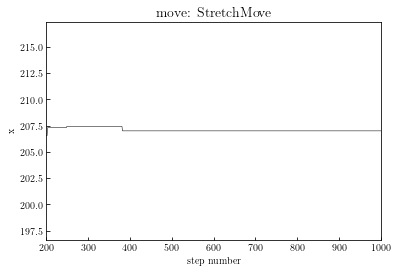

In [28]:
%matplotlib inline
plt.plot(sampler0.get_chain()[:, 1, 0], "k", lw=0.5)
plt.xlim(200, 1000)
samp=sampler0.get_chain()[:, 1, 0]
vmin=np.min(samp[400:1000])
vmax=np.max(samp[400:1000])
plt.ylim(vmin, vmax)
plt.title("move: StretchMove", fontsize=14)
plt.xlabel("step number")
plt.ylabel("x");
#print("Autocorrelation time: {0:.2f} steps".format(sampler0.get_autocorr_time()[0]))